In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import rdkit
import nltk
import tensorflow as tf
import torch
import scipy
import chempy
from sklearn.model_selection import train_test_split


In [2]:
df_drug = pd.read_csv(r"D:\projects dataset\PubChem\PubChem_compound_list_5qFAzbRO0fLm2NPBUbma7KYaxHr4Z5BN6miLAfF5mQDxYKU.csv",low_memory=False)
df_drug.head()

,cid,cmpdname,cmpdsynonym,mw,mf,polararea,complexity,xlogp,heavycnt,hbonddonor,...,inchikey,iupacname,meshheadings,annothits,annothitcnt,aids,cidcdate,sidsrcname,depcatg,annotation
0,1,Acetylcarnitine,Acetyl-DL-carnitine|acetylcarnitine|DL-O-Acety...,203.24,C9H17NO4,66.4,214.0,0.4,14,0,...,RDHQFKQIGNGIED-UHFFFAOYSA-N,3-acetyloxy-4-(trimethylazaniumyl)butanoate,Acetylcarnitine,Biomolecular Interactions and Pathways|Classif...,8,NaN,20050623,3WAY PHARM INC|A2B Chem|AA BLOCKS|AbaChemScene...,Chemical Vendors|Curation Efforts|Governmental...,NaN
1,2,"1-Propanaminium, 2-(acetyloxy)-3-carboxy-N,N,N...","1-Propanaminium, 2-(acetyloxy)-3-carboxy-N,N,N...",204.24,C9H18NO4+,63.6,219.0,-0.3,14,1,...,RDHQFKQIGNGIED-UHFFFAOYSA-O,(2-acetyloxy-3-carboxypropyl)-trimethylazanium,NaN,Biological Test Results|Chemical and Physical ...,8,781325|1272365|1671498,20050623,001Chemical|3B Scientific (Wuhan) Corp|3WAY PH...,Chemical Vendors|Curation Efforts|Governmental...,NaN
2,6,"1-Chloro-2,4-dinitrobenzene","1-chloro-2,4-dinitrobenzene|2,4-Dinitrochlorob...",202.55,C6H3ClN2O4,91.6,224.0,2.3,13,0,...,VYZAHLCBVHPDDF-UHFFFAOYSA-N,"1-chloro-2,4-dinitrobenzene",Dinitrochlorobenzene,Biological Test Results|Biomolecular Interacti...,13,155|157|161|165|167|175|179|192|220|300|302|11...,20050326,3B Scientific (Wuhan) Corp|3WAY PHARM INC|A&J ...,Chemical Vendors|Curation Efforts|Governmental...,NaN
3,11,"1,2-Dichloroethane","1,2-dichloroethane|Ethylene dichloride|107-06-...",98.96,C2H4Cl2,0.0,6.0,1.5,4,0,...,WSLDOOZREJYCGB-UHFFFAOYSA-N,"1,2-dichloroethane",NaN,Agrochemical Information|Biological Test Resul...,15,421|426|427|433|434|435|445|530|540|541|542|54...,20040916,3B Scientific (Wuhan) Corp|A2B Chem|AA BLOCKS|...,Chemical Vendors|Curation Efforts|Governmental...,NaN
4,34,2-Chloroethanol,2-chloroethanol|Ethylene chlorohydrin|107-07-3...,80.51,C2H5ClO,20.2,10.0,-0.1,4,1,...,SZIFAVKTNFCBPC-UHFFFAOYSA-N,2-chloroethanol,Ethylene Chlorohydrin,Biological Test Results|Biomolecular Interacti...,13,256|1188|384212|651631|651632|651633|651634|72...,20050326,3B Scientific (Wuhan) Corp|AA BLOCKS|abcr GmbH...,Chemical Vendors|Curation Efforts|Governmental...,NaN


In [3]:
df_drug.isnull().sum()

cid                 0
cmpdname           20
cmpdsynonym        20
mw                  0
mf                  0
polararea           0
complexity          0
xlogp            6206
heavycnt            0
hbonddonor          0
hbondacc            0
rotbonds            0
inchi               0
isosmiles           0
inchikey            0
iupacname         246
meshheadings    13124
annothits           0
annothitcnt         0
aids             8226
cidcdate            0
sidsrcname          0
depcatg             0
annotation      17350
dtype: int64

In [4]:
df_drug.dtypes

cid               int64
cmpdname         object
cmpdsynonym      object
mw              float64
mf               object
polararea       float64
complexity      float64
xlogp           float64
heavycnt          int64
hbonddonor        int64
hbondacc          int64
rotbonds          int64
inchi            object
isosmiles        object
inchikey         object
iupacname        object
meshheadings     object
annothits        object
annothitcnt       int64
aids             object
cidcdate          int64
sidsrcname       object
depcatg          object
annotation       object
dtype: object

In [5]:
df_drug.columns

Index(['cid', 'cmpdname', 'cmpdsynonym', 'mw', 'mf', 'polararea', 'complexity',
       'xlogp', 'heavycnt', 'hbonddonor', 'hbondacc', 'rotbonds', 'inchi',
       'isosmiles', 'inchikey', 'iupacname', 'meshheadings', 'annothits',
       'annothitcnt', 'aids', 'cidcdate', 'sidsrcname', 'depcatg',
       'annotation'],
      dtype='object')

In [6]:
df_drug.index

RangeIndex(start=0, stop=18070, step=1)

In [7]:
df_drug.describe()

,cid,mw,polararea,complexity,xlogp,heavycnt,hbonddonor,hbondacc,rotbonds,annothitcnt,cidcdate
count,1.807000e+04,18070.000000,18070.000000,18070.000000,11864.000000,18070.000000,18070.000000,18070.000000,18070.000000,18070.000000,1.807000e+04
mean,3.668300e+07,556.850032,167.878789,903.502756,1.830975,37.717156,4.250249,9.226508,9.237908,8.216049,2.008828e+07
std,4.850345e+07,644.883087,280.215873,1648.927978,4.495641,44.058297,8.230002,12.354675,17.665847,3.094331,4.954304e+04
min,1.000000e+00,2.016000,0.000000,0.000000,-70.200000,0.000000,0.000000,0.000000,0.000000,1.000000,2.004092e+07
25%,1.202102e+05,295.400000,60.800000,326.000000,0.500000,20.000000,1.000000,4.000000,3.000000,6.000000,2.005062e+07
50%,1.018752e+07,416.600000,102.500000,579.000000,2.500000,29.000000,2.000000,6.000000,6.000000,8.000000,2.006102e+07
75%,5.841895e+07,591.175000,179.000000,912.000000,4.100000,40.000000,4.000000,11.000000,9.000000,11.000000,2.012082e+07
max,1.645755e+08,8945.000000,4050.000000,26600.000000,29.300000,568.000000,116.000000,204.000000,232.000000,15.000000,2.022073e+07


In [8]:
df_drug.mean()

C:\Users\Acer\AppData\Local\Temp\ipykernel_15644\2538934137.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_drug.mean()


cid            3.668300e+07
mw             5.568500e+02
polararea      1.678788e+02
complexity     9.035028e+02
xlogp          1.830975e+00
heavycnt       3.771716e+01
hbonddonor     4.250249e+00
hbondacc       9.226508e+00
rotbonds       9.237908e+00
annothitcnt    8.216049e+00
cidcdate       2.008828e+07
dtype: float64

In [9]:
df_drug.head()

,cid,cmpdname,cmpdsynonym,mw,mf,polararea,complexity,xlogp,heavycnt,hbonddonor,...,inchikey,iupacname,meshheadings,annothits,annothitcnt,aids,cidcdate,sidsrcname,depcatg,annotation
0,1,Acetylcarnitine,Acetyl-DL-carnitine|acetylcarnitine|DL-O-Acety...,203.24,C9H17NO4,66.4,214.0,0.4,14,0,...,RDHQFKQIGNGIED-UHFFFAOYSA-N,3-acetyloxy-4-(trimethylazaniumyl)butanoate,Acetylcarnitine,Biomolecular Interactions and Pathways|Classif...,8,NaN,20050623,3WAY PHARM INC|A2B Chem|AA BLOCKS|AbaChemScene...,Chemical Vendors|Curation Efforts|Governmental...,NaN
1,2,"1-Propanaminium, 2-(acetyloxy)-3-carboxy-N,N,N...","1-Propanaminium, 2-(acetyloxy)-3-carboxy-N,N,N...",204.24,C9H18NO4+,63.6,219.0,-0.3,14,1,...,RDHQFKQIGNGIED-UHFFFAOYSA-O,(2-acetyloxy-3-carboxypropyl)-trimethylazanium,NaN,Biological Test Results|Chemical and Physical ...,8,781325|1272365|1671498,20050623,001Chemical|3B Scientific (Wuhan) Corp|3WAY PH...,Chemical Vendors|Curation Efforts|Governmental...,NaN
2,6,"1-Chloro-2,4-dinitrobenzene","1-chloro-2,4-dinitrobenzene|2,4-Dinitrochlorob...",202.55,C6H3ClN2O4,91.6,224.0,2.3,13,0,...,VYZAHLCBVHPDDF-UHFFFAOYSA-N,"1-chloro-2,4-dinitrobenzene",Dinitrochlorobenzene,Biological Test Results|Biomolecular Interacti...,13,155|157|161|165|167|175|179|192|220|300|302|11...,20050326,3B Scientific (Wuhan) Corp|3WAY PHARM INC|A&J ...,Chemical Vendors|Curation Efforts|Governmental...,NaN
3,11,"1,2-Dichloroethane","1,2-dichloroethane|Ethylene dichloride|107-06-...",98.96,C2H4Cl2,0.0,6.0,1.5,4,0,...,WSLDOOZREJYCGB-UHFFFAOYSA-N,"1,2-dichloroethane",NaN,Agrochemical Information|Biological Test Resul...,15,421|426|427|433|434|435|445|530|540|541|542|54...,20040916,3B Scientific (Wuhan) Corp|A2B Chem|AA BLOCKS|...,Chemical Vendors|Curation Efforts|Governmental...,NaN
4,34,2-Chloroethanol,2-chloroethanol|Ethylene chlorohydrin|107-07-3...,80.51,C2H5ClO,20.2,10.0,-0.1,4,1,...,SZIFAVKTNFCBPC-UHFFFAOYSA-N,2-chloroethanol,Ethylene Chlorohydrin,Biological Test Results|Biomolecular Interacti...,13,256|1188|384212|651631|651632|651633|651634|72...,20050326,3B Scientific (Wuhan) Corp|AA BLOCKS|abcr GmbH...,Chemical Vendors|Curation Efforts|Governmental...,NaN


In [10]:
from rdkit.Chem import MolFromSmiles
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors


def mw_to_smiles(mw):
    mol = Chem.MolFromSmiles('')
    mol.SetProp("_Name", str(mw))
    rdMolDescriptors.CalcExactMolWt(mol)
    smiles = Chem.MolToSmiles(mol)
    return smiles

df_drug['smiles'] = df_drug['mw'].apply(mw_to_smiles)

In [11]:
print(df_drug['smiles'])

0         
1         
2         
3         
4         
        ..
18065     
18066     
18067     
18068     
18069     
Name: smiles, Length: 18070, dtype: object


In [12]:
df_drug.head()

,cid,cmpdname,cmpdsynonym,mw,mf,polararea,complexity,xlogp,heavycnt,hbonddonor,...,iupacname,meshheadings,annothits,annothitcnt,aids,cidcdate,sidsrcname,depcatg,annotation,smiles
0,1,Acetylcarnitine,Acetyl-DL-carnitine|acetylcarnitine|DL-O-Acety...,203.24,C9H17NO4,66.4,214.0,0.4,14,0,...,3-acetyloxy-4-(trimethylazaniumyl)butanoate,Acetylcarnitine,Biomolecular Interactions and Pathways|Classif...,8,NaN,20050623,3WAY PHARM INC|A2B Chem|AA BLOCKS|AbaChemScene...,Chemical Vendors|Curation Efforts|Governmental...,NaN,
1,2,"1-Propanaminium, 2-(acetyloxy)-3-carboxy-N,N,N...","1-Propanaminium, 2-(acetyloxy)-3-carboxy-N,N,N...",204.24,C9H18NO4+,63.6,219.0,-0.3,14,1,...,(2-acetyloxy-3-carboxypropyl)-trimethylazanium,NaN,Biological Test Results|Chemical and Physical ...,8,781325|1272365|1671498,20050623,001Chemical|3B Scientific (Wuhan) Corp|3WAY PH...,Chemical Vendors|Curation Efforts|Governmental...,NaN,
2,6,"1-Chloro-2,4-dinitrobenzene","1-chloro-2,4-dinitrobenzene|2,4-Dinitrochlorob...",202.55,C6H3ClN2O4,91.6,224.0,2.3,13,0,...,"1-chloro-2,4-dinitrobenzene",Dinitrochlorobenzene,Biological Test Results|Biomolecular Interacti...,13,155|157|161|165|167|175|179|192|220|300|302|11...,20050326,3B Scientific (Wuhan) Corp|3WAY PHARM INC|A&J ...,Chemical Vendors|Curation Efforts|Governmental...,NaN,
3,11,"1,2-Dichloroethane","1,2-dichloroethane|Ethylene dichloride|107-06-...",98.96,C2H4Cl2,0.0,6.0,1.5,4,0,...,"1,2-dichloroethane",NaN,Agrochemical Information|Biological Test Resul...,15,421|426|427|433|434|435|445|530|540|541|542|54...,20040916,3B Scientific (Wuhan) Corp|A2B Chem|AA BLOCKS|...,Chemical Vendors|Curation Efforts|Governmental...,NaN,
4,34,2-Chloroethanol,2-chloroethanol|Ethylene chlorohydrin|107-07-3...,80.51,C2H5ClO,20.2,10.0,-0.1,4,1,...,2-chloroethanol,Ethylene Chlorohydrin,Biological Test Results|Biomolecular Interacti...,13,256|1188|384212|651631|651632|651633|651634|72...,20050326,3B Scientific (Wuhan) Corp|AA BLOCKS|abcr GmbH...,Chemical Vendors|Curation Efforts|Governmental...,NaN,


In [13]:
df_drug['cmpdname'].isnull().sum()

20

In [14]:
df_drug['cmpdsynonym'].isnull().sum()

20

In [15]:
df_drug.isnull().sum()

cid                 0
cmpdname           20
cmpdsynonym        20
mw                  0
mf                  0
polararea           0
complexity          0
xlogp            6206
heavycnt            0
hbonddonor          0
hbondacc            0
rotbonds            0
inchi               0
isosmiles           0
inchikey            0
iupacname         246
meshheadings    13124
annothits           0
annothitcnt         0
aids             8226
cidcdate            0
sidsrcname          0
depcatg             0
annotation      17350
smiles              0
dtype: int64

In [16]:
df_drug['meshheadings']

0              Acetylcarnitine
1                          NaN
2         Dinitrochlorobenzene
3                          NaN
4        Ethylene Chlorohydrin
                 ...          
18065                      NaN
18066                      NaN
18067                      NaN
18068                      NaN
18069                      NaN
Name: meshheadings, Length: 18070, dtype: object

In [17]:
df_drug['annotation']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
18065    NaN
18066    NaN
18067    NaN
18068    NaN
18069    NaN
Name: annotation, Length: 18070, dtype: object

In [18]:
df_drug['aids']

0                                                      NaN
1                                   781325|1272365|1671498
2        155|157|161|165|167|175|179|192|220|300|302|11...
3        421|426|427|433|434|435|445|530|540|541|542|54...
4        256|1188|384212|651631|651632|651633|651634|72...
                               ...                        
18065                                                  NaN
18066                                                  NaN
18067                                                  NaN
18068                                                  NaN
18069                                                  NaN
Name: aids, Length: 18070, dtype: object

In [19]:
df_drug['xlogp']

0        0.4
1       -0.3
2        2.3
3        1.5
4       -0.1
        ... 
18065    NaN
18066    NaN
18067    2.5
18068    2.8
18069    3.3
Name: xlogp, Length: 18070, dtype: float64

In [20]:
print("Missing data percentage: \n")
df_drug[["cmpdname","cmpdsynonym","xlogp","iupacname","meshheadings","aids","annotation"]].isnull().sum()/len(df_drug["cmpdname"]) * 100

Missing data percentage: 



cmpdname         0.110681
cmpdsynonym      0.110681
xlogp           34.344217
iupacname        1.361372
meshheadings    72.628666
aids            45.522966
annotation      96.015495
dtype: float64

#### Must delete "xlogp", "meshheadings", "aids" and "annotation"

In [21]:
df_refine_drug = df_drug.drop(["xlogp", "meshheadings", "aids", "annotation"], axis=1)#, inplace=True)

In [22]:
df_refine_drug.isnull().sum()

cid              0
cmpdname        20
cmpdsynonym     20
mw               0
mf               0
polararea        0
complexity       0
heavycnt         0
hbonddonor       0
hbondacc         0
rotbonds         0
inchi            0
isosmiles        0
inchikey         0
iupacname      246
annothits        0
annothitcnt      0
cidcdate         0
sidsrcname       0
depcatg          0
smiles           0
dtype: int64

#### Deleting rows with null values.

In [23]:
df_refine_drug.dropna(inplace=True)

In [24]:
#df_drug.dropna(inplace=True)

In [25]:
df_refine_drug.isnull().sum()

cid            0
cmpdname       0
cmpdsynonym    0
mw             0
mf             0
polararea      0
complexity     0
heavycnt       0
hbonddonor     0
hbondacc       0
rotbonds       0
inchi          0
isosmiles      0
inchikey       0
iupacname      0
annothits      0
annothitcnt    0
cidcdate       0
sidsrcname     0
depcatg        0
smiles         0
dtype: int64

In [26]:
#df_drug.isnull().sum()

In [27]:
df_refine_drug.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17785 entries, 0 to 18069
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cid          17785 non-null  int64  
 1   cmpdname     17785 non-null  object 
 2   cmpdsynonym  17785 non-null  object 
 3   mw           17785 non-null  float64
 4   mf           17785 non-null  object 
 5   polararea    17785 non-null  float64
 6   complexity   17785 non-null  float64
 7   heavycnt     17785 non-null  int64  
 8   hbonddonor   17785 non-null  int64  
 9   hbondacc     17785 non-null  int64  
 10  rotbonds     17785 non-null  int64  
 11  inchi        17785 non-null  object 
 12  isosmiles    17785 non-null  object 
 13  inchikey     17785 non-null  object 
 14  iupacname    17785 non-null  object 
 15  annothits    17785 non-null  object 
 16  annothitcnt  17785 non-null  int64  
 17  cidcdate     17785 non-null  int64  
 18  sidsrcname   17785 non-null  object 
 19  depc

In [28]:
df_refine_drug.columns

Index(['cid', 'cmpdname', 'cmpdsynonym', 'mw', 'mf', 'polararea', 'complexity',
       'heavycnt', 'hbonddonor', 'hbondacc', 'rotbonds', 'inchi', 'isosmiles',
       'inchikey', 'iupacname', 'annothits', 'annothitcnt', 'cidcdate',
       'sidsrcname', 'depcatg', 'smiles'],
      dtype='object')

#### Plots

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [30]:
df_refine_drug.head()

,cid,cmpdname,cmpdsynonym,mw,mf,polararea,complexity,heavycnt,hbonddonor,hbondacc,...,inchi,isosmiles,inchikey,iupacname,annothits,annothitcnt,cidcdate,sidsrcname,depcatg,smiles
0,1,Acetylcarnitine,Acetyl-DL-carnitine|acetylcarnitine|DL-O-Acety...,203.24,C9H17NO4,66.4,214.0,14,0,4,...,InChI=1S/C9H17NO4/c1-7(11)14-8(5-9(12)13)6-10(...,CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C,RDHQFKQIGNGIED-UHFFFAOYSA-N,3-acetyloxy-4-(trimethylazaniumyl)butanoate,Biomolecular Interactions and Pathways|Classif...,8,20050623,3WAY PHARM INC|A2B Chem|AA BLOCKS|AbaChemScene...,Chemical Vendors|Curation Efforts|Governmental...,
1,2,"1-Propanaminium, 2-(acetyloxy)-3-carboxy-N,N,N...","1-Propanaminium, 2-(acetyloxy)-3-carboxy-N,N,N...",204.24,C9H18NO4+,63.6,219.0,14,1,4,...,InChI=1S/C9H17NO4/c1-7(11)14-8(5-9(12)13)6-10(...,CC(=O)OC(CC(=O)O)C[N+](C)(C)C,RDHQFKQIGNGIED-UHFFFAOYSA-O,(2-acetyloxy-3-carboxypropyl)-trimethylazanium,Biological Test Results|Chemical and Physical ...,8,20050623,001Chemical|3B Scientific (Wuhan) Corp|3WAY PH...,Chemical Vendors|Curation Efforts|Governmental...,
2,6,"1-Chloro-2,4-dinitrobenzene","1-chloro-2,4-dinitrobenzene|2,4-Dinitrochlorob...",202.55,C6H3ClN2O4,91.6,224.0,13,0,4,...,InChI=1S/C6H3ClN2O4/c7-5-2-1-4(8(10)11)3-6(5)9...,C1=CC(=C(C=C1[N+](=O)[O-])[N+](=O)[O-])Cl,VYZAHLCBVHPDDF-UHFFFAOYSA-N,"1-chloro-2,4-dinitrobenzene",Biological Test Results|Biomolecular Interacti...,13,20050326,3B Scientific (Wuhan) Corp|3WAY PHARM INC|A&J ...,Chemical Vendors|Curation Efforts|Governmental...,
3,11,"1,2-Dichloroethane","1,2-dichloroethane|Ethylene dichloride|107-06-...",98.96,C2H4Cl2,0.0,6.0,4,0,0,...,InChI=1S/C2H4Cl2/c3-1-2-4/h1-2H2,C(CCl)Cl,WSLDOOZREJYCGB-UHFFFAOYSA-N,"1,2-dichloroethane",Agrochemical Information|Biological Test Resul...,15,20040916,3B Scientific (Wuhan) Corp|A2B Chem|AA BLOCKS|...,Chemical Vendors|Curation Efforts|Governmental...,
4,34,2-Chloroethanol,2-chloroethanol|Ethylene chlorohydrin|107-07-3...,80.51,C2H5ClO,20.2,10.0,4,1,1,...,"InChI=1S/C2H5ClO/c3-1-2-4/h4H,1-2H2",C(CCl)O,SZIFAVKTNFCBPC-UHFFFAOYSA-N,2-chloroethanol,Biological Test Results|Biomolecular Interacti...,13,20050326,3B Scientific (Wuhan) Corp|AA BLOCKS|abcr GmbH...,Chemical Vendors|Curation Efforts|Governmental...,


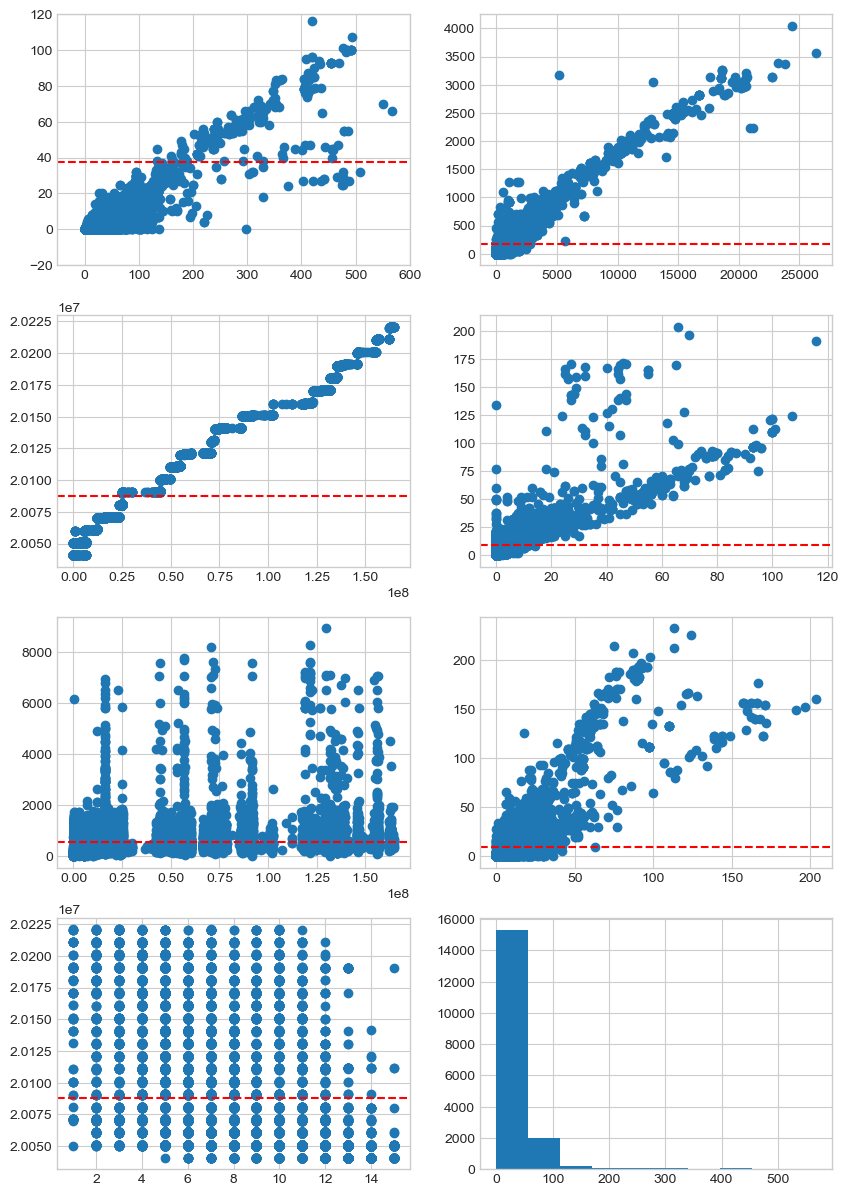

In [31]:
plt.style.use("seaborn-whitegrid")
fig, ax = plt.subplots(nrows = 4,
                      ncols = 2,
                      figsize=(10, 15))

# Plot to each different index

ax[0, 0].scatter(x=df_refine_drug['heavycnt'],y=df_refine_drug['hbonddonor']);
ax[0, 1].scatter(x=df_refine_drug['complexity'],y=df_refine_drug['polararea']);
ax[1, 0].scatter(x=df_refine_drug["cid"], y=df_refine_drug['cidcdate']);
ax[1, 1].scatter(x=df_refine_drug['hbonddonor'],y=df_refine_drug['hbondacc']);
ax[2, 0].scatter(x=df_refine_drug['cid'], y=df_refine_drug['mw']);
ax[2, 1].scatter(x=df_refine_drug['hbondacc'], y=df_refine_drug['rotbonds']);
ax[3, 0].scatter(x=df_refine_drug['annothitcnt'], y=df_refine_drug['cidcdate'])
ax[3, 1].hist(x=df_refine_drug['heavycnt']);

# Change ax1 x axis limits
ax[0,0].set_xlim([-50, 600])
ax[0,0].set_ylim([-20, 120])


ax[0,0].axhline(df_refine_drug["heavycnt"].mean(),
          linestyle='--',
               color='red');
ax[0,1].axhline(df_refine_drug["polararea"].mean(),
          linestyle='--',
               color='red');
ax[1,0].axhline(df_refine_drug["cidcdate"].mean(),
          linestyle='--',
               color='red');
ax[1,1].axhline(df_refine_drug["hbondacc"].mean(),
          linestyle='--',
               color='red');
ax[2,0].axhline(df_refine_drug["mw"].mean(),
          linestyle='--',
               color='red');
ax[2,1].axhline(df_refine_drug["rotbonds"].mean(),
          linestyle='--',
               color='red');
ax[3,0].axhline(df_refine_drug["cidcdate"].mean(),
          linestyle='--',
               color='red');

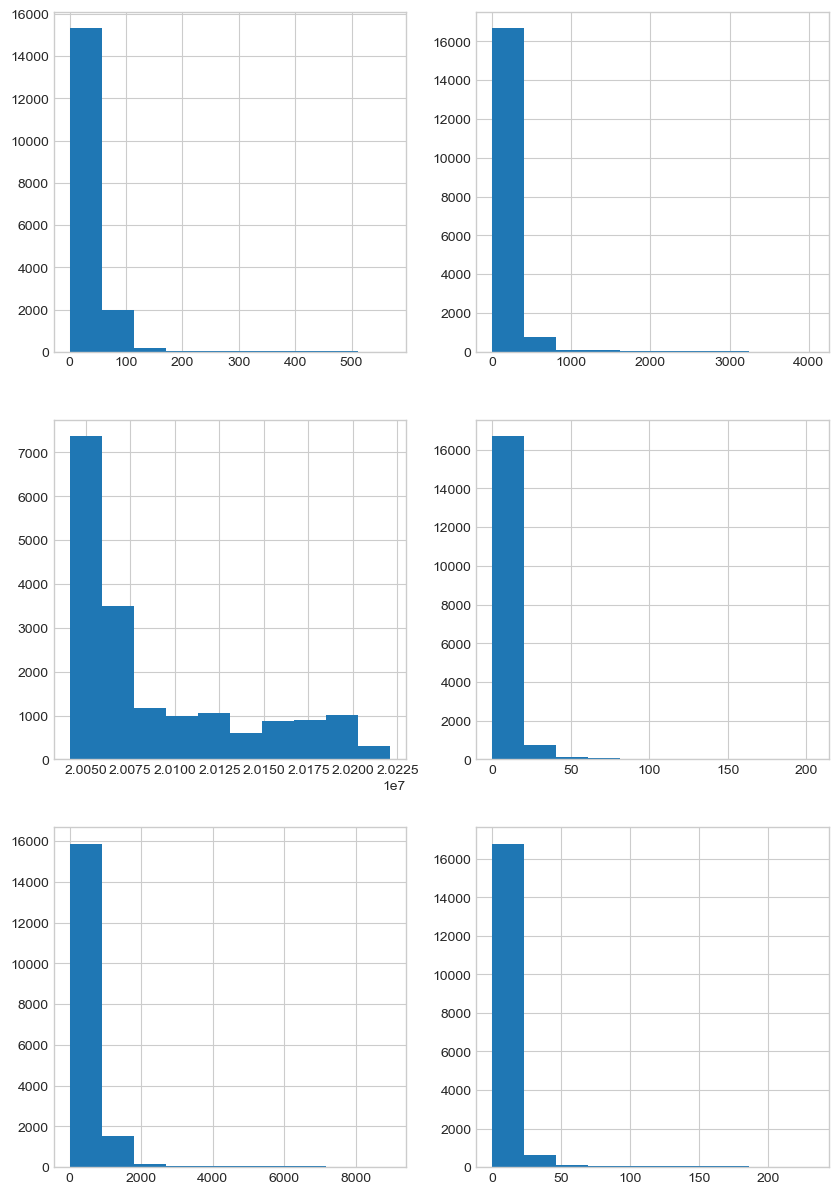

In [32]:
plt.style.use("seaborn-whitegrid")
fig, ax = plt.subplots(nrows = 3,
                      ncols = 2,
                      figsize=(10, 15))

# Plot to each different index
ax[0, 0].hist(x=df_refine_drug['heavycnt']);
ax[0, 1].hist(x=df_refine_drug['polararea']);
ax[1, 0].hist(x=df_refine_drug['cidcdate']);
ax[1, 1].hist(x=df_refine_drug['hbondacc']);
ax[2, 0].hist(x=df_refine_drug['mw']);
ax[2, 1].hist(x=df_refine_drug['rotbonds']);


In [33]:
df_refine_drug.head() 

,cid,cmpdname,cmpdsynonym,mw,mf,polararea,complexity,heavycnt,hbonddonor,hbondacc,...,inchi,isosmiles,inchikey,iupacname,annothits,annothitcnt,cidcdate,sidsrcname,depcatg,smiles
0,1,Acetylcarnitine,Acetyl-DL-carnitine|acetylcarnitine|DL-O-Acety...,203.24,C9H17NO4,66.4,214.0,14,0,4,...,InChI=1S/C9H17NO4/c1-7(11)14-8(5-9(12)13)6-10(...,CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C,RDHQFKQIGNGIED-UHFFFAOYSA-N,3-acetyloxy-4-(trimethylazaniumyl)butanoate,Biomolecular Interactions and Pathways|Classif...,8,20050623,3WAY PHARM INC|A2B Chem|AA BLOCKS|AbaChemScene...,Chemical Vendors|Curation Efforts|Governmental...,
1,2,"1-Propanaminium, 2-(acetyloxy)-3-carboxy-N,N,N...","1-Propanaminium, 2-(acetyloxy)-3-carboxy-N,N,N...",204.24,C9H18NO4+,63.6,219.0,14,1,4,...,InChI=1S/C9H17NO4/c1-7(11)14-8(5-9(12)13)6-10(...,CC(=O)OC(CC(=O)O)C[N+](C)(C)C,RDHQFKQIGNGIED-UHFFFAOYSA-O,(2-acetyloxy-3-carboxypropyl)-trimethylazanium,Biological Test Results|Chemical and Physical ...,8,20050623,001Chemical|3B Scientific (Wuhan) Corp|3WAY PH...,Chemical Vendors|Curation Efforts|Governmental...,
2,6,"1-Chloro-2,4-dinitrobenzene","1-chloro-2,4-dinitrobenzene|2,4-Dinitrochlorob...",202.55,C6H3ClN2O4,91.6,224.0,13,0,4,...,InChI=1S/C6H3ClN2O4/c7-5-2-1-4(8(10)11)3-6(5)9...,C1=CC(=C(C=C1[N+](=O)[O-])[N+](=O)[O-])Cl,VYZAHLCBVHPDDF-UHFFFAOYSA-N,"1-chloro-2,4-dinitrobenzene",Biological Test Results|Biomolecular Interacti...,13,20050326,3B Scientific (Wuhan) Corp|3WAY PHARM INC|A&J ...,Chemical Vendors|Curation Efforts|Governmental...,
3,11,"1,2-Dichloroethane","1,2-dichloroethane|Ethylene dichloride|107-06-...",98.96,C2H4Cl2,0.0,6.0,4,0,0,...,InChI=1S/C2H4Cl2/c3-1-2-4/h1-2H2,C(CCl)Cl,WSLDOOZREJYCGB-UHFFFAOYSA-N,"1,2-dichloroethane",Agrochemical Information|Biological Test Resul...,15,20040916,3B Scientific (Wuhan) Corp|A2B Chem|AA BLOCKS|...,Chemical Vendors|Curation Efforts|Governmental...,
4,34,2-Chloroethanol,2-chloroethanol|Ethylene chlorohydrin|107-07-3...,80.51,C2H5ClO,20.2,10.0,4,1,1,...,"InChI=1S/C2H5ClO/c3-1-2-4/h4H,1-2H2",C(CCl)O,SZIFAVKTNFCBPC-UHFFFAOYSA-N,2-chloroethanol,Biological Test Results|Biomolecular Interacti...,13,20050326,3B Scientific (Wuhan) Corp|AA BLOCKS|abcr GmbH...,Chemical Vendors|Curation Efforts|Governmental...,


In [34]:
df_refine_drug.columns

Index(['cid', 'cmpdname', 'cmpdsynonym', 'mw', 'mf', 'polararea', 'complexity',
       'heavycnt', 'hbonddonor', 'hbondacc', 'rotbonds', 'inchi', 'isosmiles',
       'inchikey', 'iupacname', 'annothits', 'annothitcnt', 'cidcdate',
       'sidsrcname', 'depcatg', 'smiles'],
      dtype='object')

In [35]:
df_refine_drug.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17785 entries, 0 to 18069
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cid          17785 non-null  int64  
 1   cmpdname     17785 non-null  object 
 2   cmpdsynonym  17785 non-null  object 
 3   mw           17785 non-null  float64
 4   mf           17785 non-null  object 
 5   polararea    17785 non-null  float64
 6   complexity   17785 non-null  float64
 7   heavycnt     17785 non-null  int64  
 8   hbonddonor   17785 non-null  int64  
 9   hbondacc     17785 non-null  int64  
 10  rotbonds     17785 non-null  int64  
 11  inchi        17785 non-null  object 
 12  isosmiles    17785 non-null  object 
 13  inchikey     17785 non-null  object 
 14  iupacname    17785 non-null  object 
 15  annothits    17785 non-null  object 
 16  annothitcnt  17785 non-null  int64  
 17  cidcdate     17785 non-null  int64  
 18  sidsrcname   17785 non-null  object 
 19  depc

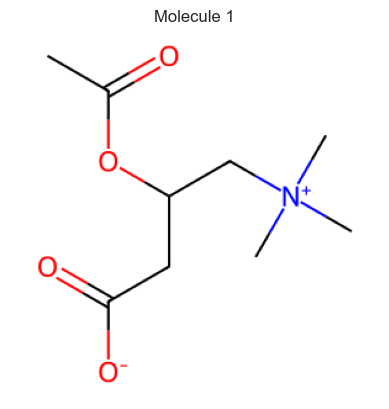

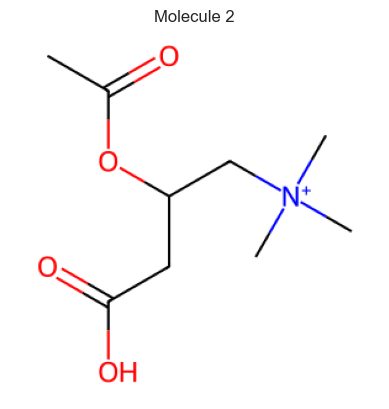

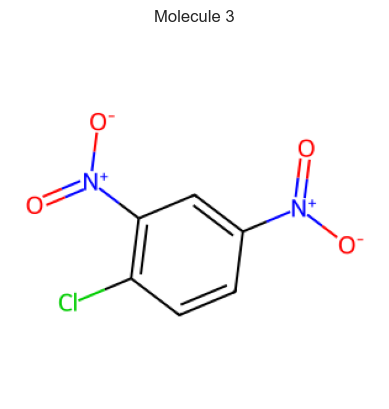

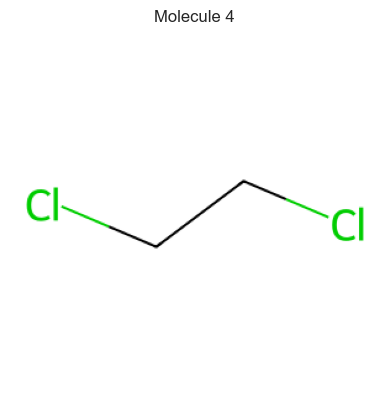

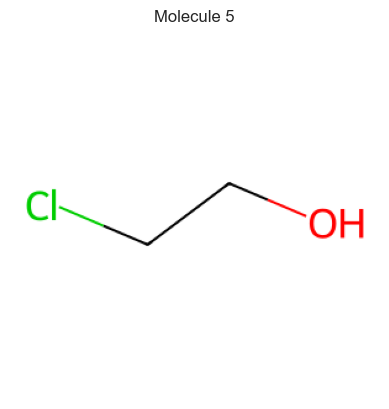

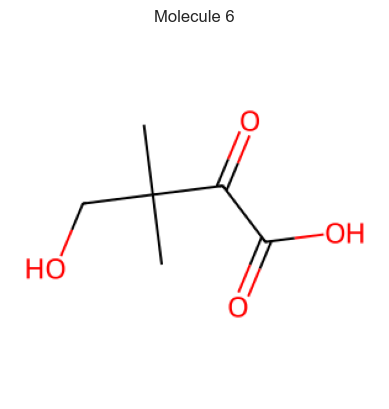

In [36]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt

# read the dataframe
#df = pd.read_csv('your_data.csv')

# get the first 5 SMILES strings
smiles_list = df_refine_drug['isosmiles'][:6]

# plot the molecules
for i, smiles in enumerate(smiles_list):
    # convert SMILES to RDKit molecule
    mol = Chem.MolFromSmiles(smiles)
    # plot the molecule
    fig, ax = plt.subplots()
    ax.imshow(Draw.MolToImage(mol))
    ax.axis('off')
    ax.set_title(f'Molecule {i+1}')
    plt.show()

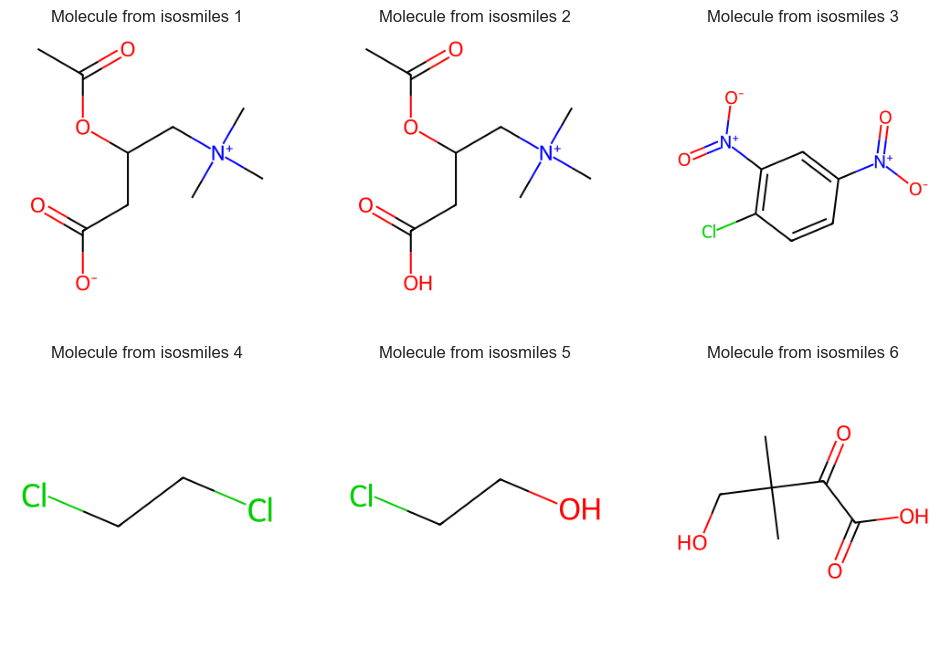

In [37]:
# plot the molecules
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12,8))

for i, smiles in enumerate(smiles_list):
    # convert SMILES to RDKit molecule
    mol = Chem.MolFromSmiles(smiles)
    # plot the molecule on a subplot
    row = i // 3
    col = i % 3
    axs[row, col].imshow(Draw.MolToImage(mol))
    axs[row, col].axis('off')
    axs[row, col].set_title(f'Molecule from isosmiles {i+1}')

plt.show()

In [38]:
df_refine_drug.head()

,cid,cmpdname,cmpdsynonym,mw,mf,polararea,complexity,heavycnt,hbonddonor,hbondacc,...,inchi,isosmiles,inchikey,iupacname,annothits,annothitcnt,cidcdate,sidsrcname,depcatg,smiles
0,1,Acetylcarnitine,Acetyl-DL-carnitine|acetylcarnitine|DL-O-Acety...,203.24,C9H17NO4,66.4,214.0,14,0,4,...,InChI=1S/C9H17NO4/c1-7(11)14-8(5-9(12)13)6-10(...,CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C,RDHQFKQIGNGIED-UHFFFAOYSA-N,3-acetyloxy-4-(trimethylazaniumyl)butanoate,Biomolecular Interactions and Pathways|Classif...,8,20050623,3WAY PHARM INC|A2B Chem|AA BLOCKS|AbaChemScene...,Chemical Vendors|Curation Efforts|Governmental...,
1,2,"1-Propanaminium, 2-(acetyloxy)-3-carboxy-N,N,N...","1-Propanaminium, 2-(acetyloxy)-3-carboxy-N,N,N...",204.24,C9H18NO4+,63.6,219.0,14,1,4,...,InChI=1S/C9H17NO4/c1-7(11)14-8(5-9(12)13)6-10(...,CC(=O)OC(CC(=O)O)C[N+](C)(C)C,RDHQFKQIGNGIED-UHFFFAOYSA-O,(2-acetyloxy-3-carboxypropyl)-trimethylazanium,Biological Test Results|Chemical and Physical ...,8,20050623,001Chemical|3B Scientific (Wuhan) Corp|3WAY PH...,Chemical Vendors|Curation Efforts|Governmental...,
2,6,"1-Chloro-2,4-dinitrobenzene","1-chloro-2,4-dinitrobenzene|2,4-Dinitrochlorob...",202.55,C6H3ClN2O4,91.6,224.0,13,0,4,...,InChI=1S/C6H3ClN2O4/c7-5-2-1-4(8(10)11)3-6(5)9...,C1=CC(=C(C=C1[N+](=O)[O-])[N+](=O)[O-])Cl,VYZAHLCBVHPDDF-UHFFFAOYSA-N,"1-chloro-2,4-dinitrobenzene",Biological Test Results|Biomolecular Interacti...,13,20050326,3B Scientific (Wuhan) Corp|3WAY PHARM INC|A&J ...,Chemical Vendors|Curation Efforts|Governmental...,
3,11,"1,2-Dichloroethane","1,2-dichloroethane|Ethylene dichloride|107-06-...",98.96,C2H4Cl2,0.0,6.0,4,0,0,...,InChI=1S/C2H4Cl2/c3-1-2-4/h1-2H2,C(CCl)Cl,WSLDOOZREJYCGB-UHFFFAOYSA-N,"1,2-dichloroethane",Agrochemical Information|Biological Test Resul...,15,20040916,3B Scientific (Wuhan) Corp|A2B Chem|AA BLOCKS|...,Chemical Vendors|Curation Efforts|Governmental...,
4,34,2-Chloroethanol,2-chloroethanol|Ethylene chlorohydrin|107-07-3...,80.51,C2H5ClO,20.2,10.0,4,1,1,...,"InChI=1S/C2H5ClO/c3-1-2-4/h4H,1-2H2",C(CCl)O,SZIFAVKTNFCBPC-UHFFFAOYSA-N,2-chloroethanol,Biological Test Results|Biomolecular Interacti...,13,20050326,3B Scientific (Wuhan) Corp|AA BLOCKS|abcr GmbH...,Chemical Vendors|Curation Efforts|Governmental...,


In [39]:
# also can delete depcatg, smiles, sidsrcname
df_refine_drug = df_refine_drug.drop(["depcatg", "smiles", "sidsrcname"], axis=1)#, inplace=True)
df_refine_drug.head()

,cid,cmpdname,cmpdsynonym,mw,mf,polararea,complexity,heavycnt,hbonddonor,hbondacc,rotbonds,inchi,isosmiles,inchikey,iupacname,annothits,annothitcnt,cidcdate
0,1,Acetylcarnitine,Acetyl-DL-carnitine|acetylcarnitine|DL-O-Acety...,203.24,C9H17NO4,66.4,214.0,14,0,4,5,InChI=1S/C9H17NO4/c1-7(11)14-8(5-9(12)13)6-10(...,CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C,RDHQFKQIGNGIED-UHFFFAOYSA-N,3-acetyloxy-4-(trimethylazaniumyl)butanoate,Biomolecular Interactions and Pathways|Classif...,8,20050623
1,2,"1-Propanaminium, 2-(acetyloxy)-3-carboxy-N,N,N...","1-Propanaminium, 2-(acetyloxy)-3-carboxy-N,N,N...",204.24,C9H18NO4+,63.6,219.0,14,1,4,6,InChI=1S/C9H17NO4/c1-7(11)14-8(5-9(12)13)6-10(...,CC(=O)OC(CC(=O)O)C[N+](C)(C)C,RDHQFKQIGNGIED-UHFFFAOYSA-O,(2-acetyloxy-3-carboxypropyl)-trimethylazanium,Biological Test Results|Chemical and Physical ...,8,20050623
2,6,"1-Chloro-2,4-dinitrobenzene","1-chloro-2,4-dinitrobenzene|2,4-Dinitrochlorob...",202.55,C6H3ClN2O4,91.6,224.0,13,0,4,0,InChI=1S/C6H3ClN2O4/c7-5-2-1-4(8(10)11)3-6(5)9...,C1=CC(=C(C=C1[N+](=O)[O-])[N+](=O)[O-])Cl,VYZAHLCBVHPDDF-UHFFFAOYSA-N,"1-chloro-2,4-dinitrobenzene",Biological Test Results|Biomolecular Interacti...,13,20050326
3,11,"1,2-Dichloroethane","1,2-dichloroethane|Ethylene dichloride|107-06-...",98.96,C2H4Cl2,0.0,6.0,4,0,0,1,InChI=1S/C2H4Cl2/c3-1-2-4/h1-2H2,C(CCl)Cl,WSLDOOZREJYCGB-UHFFFAOYSA-N,"1,2-dichloroethane",Agrochemical Information|Biological Test Resul...,15,20040916
4,34,2-Chloroethanol,2-chloroethanol|Ethylene chlorohydrin|107-07-3...,80.51,C2H5ClO,20.2,10.0,4,1,1,1,"InChI=1S/C2H5ClO/c3-1-2-4/h4H,1-2H2",C(CCl)O,SZIFAVKTNFCBPC-UHFFFAOYSA-N,2-chloroethanol,Biological Test Results|Biomolecular Interacti...,13,20050326


In [40]:
df_refine_drug.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17785 entries, 0 to 18069
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cid          17785 non-null  int64  
 1   cmpdname     17785 non-null  object 
 2   cmpdsynonym  17785 non-null  object 
 3   mw           17785 non-null  float64
 4   mf           17785 non-null  object 
 5   polararea    17785 non-null  float64
 6   complexity   17785 non-null  float64
 7   heavycnt     17785 non-null  int64  
 8   hbonddonor   17785 non-null  int64  
 9   hbondacc     17785 non-null  int64  
 10  rotbonds     17785 non-null  int64  
 11  inchi        17785 non-null  object 
 12  isosmiles    17785 non-null  object 
 13  inchikey     17785 non-null  object 
 14  iupacname    17785 non-null  object 
 15  annothits    17785 non-null  object 
 16  annothitcnt  17785 non-null  int64  
 17  cidcdate     17785 non-null  int64  
dtypes: float64(3), int64(7), object(8)
memory usag

In [41]:
df_refine_drug.isnull().sum()

cid            0
cmpdname       0
cmpdsynonym    0
mw             0
mf             0
polararea      0
complexity     0
heavycnt       0
hbonddonor     0
hbondacc       0
rotbonds       0
inchi          0
isosmiles      0
inchikey       0
iupacname      0
annothits      0
annothitcnt    0
cidcdate       0
dtype: int64

## All object datatype columns first row information.

In [42]:
df_refine_drug['cmpdname'][0] # name 

'Acetylcarnitine'

In [43]:
df_refine_drug['cmpdsynonym'][0]

'Acetyl-DL-carnitine|acetylcarnitine|DL-O-Acetylcarnitine|DL-Acetylcarnitine|3-acetyloxy-4-(trimethylazaniumyl)butanoate|3-(acetyloxy)-4-(trimethylazaniumyl)butanoate|14992-62-2|Ammonium, (3-carboxy-2-hydroxypropyl)trimethyl-, hydroxide, inner salt, acetate, DL-|1-Propanaminium, 2-(acetyloxy)-3-carboxy-N,N,N-trimethyl-, inner salt|870-77-9|(+/-)-acetylcarnitine|bmse000142|SCHEMBL69781|DTXSID2048117|CHEBI:73024|LMFA07070060|1-Propanaminium, 2-(acetoxy)-3-carboxy-N,N,N-trimethyl-, hydroxide, inner salt, (+-)-|AS-82719|HY-126358|3-(acetyloxy)-4-(trimethylammonio)butanoate|CS-0102945|FT-0778235|Q27140241|1-Propanaminium, 2-(acetoxy)-3-carboxy-N,N,N-trimethyl-, hydroxide, inner salt, (+-)- (9CI)'

In [44]:
df_refine_drug['mf'][0] #molecular formula

'C9H17NO4'

In [45]:
df_refine_drug['inchi'][0] # 

'InChI=1S/C9H17NO4/c1-7(11)14-8(5-9(12)13)6-10(2,3)4/h8H,5-6H2,1-4H3'

In [46]:
df_refine_drug['isosmiles'][0] # SMILES formula

'CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C'

In [47]:
df_refine_drug['inchikey'][0]

'RDHQFKQIGNGIED-UHFFFAOYSA-N'

In [48]:
df_refine_drug['iupacname'][0]

'3-acetyloxy-4-(trimethylazaniumyl)butanoate'

In [49]:
df_refine_drug['annothits'][0]

'Biomolecular Interactions and Pathways|Classification|Drug and Medication Information|Literature|Names and Identifiers|Patents|Pharmacology and Biochemistry|Use and Manufacturing'

## All integer and float type data columns first row data

In [50]:
df_refine_drug.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17785 entries, 0 to 18069
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cid          17785 non-null  int64  
 1   cmpdname     17785 non-null  object 
 2   cmpdsynonym  17785 non-null  object 
 3   mw           17785 non-null  float64
 4   mf           17785 non-null  object 
 5   polararea    17785 non-null  float64
 6   complexity   17785 non-null  float64
 7   heavycnt     17785 non-null  int64  
 8   hbonddonor   17785 non-null  int64  
 9   hbondacc     17785 non-null  int64  
 10  rotbonds     17785 non-null  int64  
 11  inchi        17785 non-null  object 
 12  isosmiles    17785 non-null  object 
 13  inchikey     17785 non-null  object 
 14  iupacname    17785 non-null  object 
 15  annothits    17785 non-null  object 
 16  annothitcnt  17785 non-null  int64  
 17  cidcdate     17785 non-null  int64  
dtypes: float64(3), int64(7), object(8)
memory usag

In [51]:
df_refine_drug['cid'][0]

1

In [52]:
df_refine_drug['mw'][0]

203.24

In [53]:
df_refine_drug['polararea'][0]

66.4

In [54]:
df_refine_drug['complexity'][0]

214.0

In [55]:
df_refine_drug['heavycnt'][0]

14

In [67]:
df_refine_drug['hbonddonor'][0]

0

In [57]:
df_refine_drug['rotbonds'][0]

5

In [58]:
df_refine_drug['annothitcnt'][0]

8

In [59]:
df_refine_drug['cidcdate'][0]

20050623

In [68]:
df_refine_drug.head()

,cid,cmpdname,cmpdsynonym,mw,mf,polararea,complexity,heavycnt,hbonddonor,hbondacc,rotbonds,inchi,isosmiles,inchikey,iupacname,annothits,annothitcnt,cidcdate
0,1,Acetylcarnitine,Acetyl-DL-carnitine|acetylcarnitine|DL-O-Acety...,203.24,C9H17NO4,66.4,214.0,14,0,4,5,InChI=1S/C9H17NO4/c1-7(11)14-8(5-9(12)13)6-10(...,CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C,RDHQFKQIGNGIED-UHFFFAOYSA-N,3-acetyloxy-4-(trimethylazaniumyl)butanoate,Biomolecular Interactions and Pathways|Classif...,8,20050623
1,2,"1-Propanaminium, 2-(acetyloxy)-3-carboxy-N,N,N...","1-Propanaminium, 2-(acetyloxy)-3-carboxy-N,N,N...",204.24,C9H18NO4+,63.6,219.0,14,1,4,6,InChI=1S/C9H17NO4/c1-7(11)14-8(5-9(12)13)6-10(...,CC(=O)OC(CC(=O)O)C[N+](C)(C)C,RDHQFKQIGNGIED-UHFFFAOYSA-O,(2-acetyloxy-3-carboxypropyl)-trimethylazanium,Biological Test Results|Chemical and Physical ...,8,20050623
2,6,"1-Chloro-2,4-dinitrobenzene","1-chloro-2,4-dinitrobenzene|2,4-Dinitrochlorob...",202.55,C6H3ClN2O4,91.6,224.0,13,0,4,0,InChI=1S/C6H3ClN2O4/c7-5-2-1-4(8(10)11)3-6(5)9...,C1=CC(=C(C=C1[N+](=O)[O-])[N+](=O)[O-])Cl,VYZAHLCBVHPDDF-UHFFFAOYSA-N,"1-chloro-2,4-dinitrobenzene",Biological Test Results|Biomolecular Interacti...,13,20050326
3,11,"1,2-Dichloroethane","1,2-dichloroethane|Ethylene dichloride|107-06-...",98.96,C2H4Cl2,0.0,6.0,4,0,0,1,InChI=1S/C2H4Cl2/c3-1-2-4/h1-2H2,C(CCl)Cl,WSLDOOZREJYCGB-UHFFFAOYSA-N,"1,2-dichloroethane",Agrochemical Information|Biological Test Resul...,15,20040916
4,34,2-Chloroethanol,2-chloroethanol|Ethylene chlorohydrin|107-07-3...,80.51,C2H5ClO,20.2,10.0,4,1,1,1,"InChI=1S/C2H5ClO/c3-1-2-4/h4H,1-2H2",C(CCl)O,SZIFAVKTNFCBPC-UHFFFAOYSA-N,2-chloroethanol,Biological Test Results|Biomolecular Interacti...,13,20050326


In [69]:
df_refine_drug = df_refine_drug.drop("annothits",axis=1)

In [70]:
df_refine_drug.head()

,cid,cmpdname,cmpdsynonym,mw,mf,polararea,complexity,heavycnt,hbonddonor,hbondacc,rotbonds,inchi,isosmiles,inchikey,iupacname,annothitcnt,cidcdate
0,1,Acetylcarnitine,Acetyl-DL-carnitine|acetylcarnitine|DL-O-Acety...,203.24,C9H17NO4,66.4,214.0,14,0,4,5,InChI=1S/C9H17NO4/c1-7(11)14-8(5-9(12)13)6-10(...,CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C,RDHQFKQIGNGIED-UHFFFAOYSA-N,3-acetyloxy-4-(trimethylazaniumyl)butanoate,8,20050623
1,2,"1-Propanaminium, 2-(acetyloxy)-3-carboxy-N,N,N...","1-Propanaminium, 2-(acetyloxy)-3-carboxy-N,N,N...",204.24,C9H18NO4+,63.6,219.0,14,1,4,6,InChI=1S/C9H17NO4/c1-7(11)14-8(5-9(12)13)6-10(...,CC(=O)OC(CC(=O)O)C[N+](C)(C)C,RDHQFKQIGNGIED-UHFFFAOYSA-O,(2-acetyloxy-3-carboxypropyl)-trimethylazanium,8,20050623
2,6,"1-Chloro-2,4-dinitrobenzene","1-chloro-2,4-dinitrobenzene|2,4-Dinitrochlorob...",202.55,C6H3ClN2O4,91.6,224.0,13,0,4,0,InChI=1S/C6H3ClN2O4/c7-5-2-1-4(8(10)11)3-6(5)9...,C1=CC(=C(C=C1[N+](=O)[O-])[N+](=O)[O-])Cl,VYZAHLCBVHPDDF-UHFFFAOYSA-N,"1-chloro-2,4-dinitrobenzene",13,20050326
3,11,"1,2-Dichloroethane","1,2-dichloroethane|Ethylene dichloride|107-06-...",98.96,C2H4Cl2,0.0,6.0,4,0,0,1,InChI=1S/C2H4Cl2/c3-1-2-4/h1-2H2,C(CCl)Cl,WSLDOOZREJYCGB-UHFFFAOYSA-N,"1,2-dichloroethane",15,20040916
4,34,2-Chloroethanol,2-chloroethanol|Ethylene chlorohydrin|107-07-3...,80.51,C2H5ClO,20.2,10.0,4,1,1,1,"InChI=1S/C2H5ClO/c3-1-2-4/h4H,1-2H2",C(CCl)O,SZIFAVKTNFCBPC-UHFFFAOYSA-N,2-chloroethanol,13,20050326


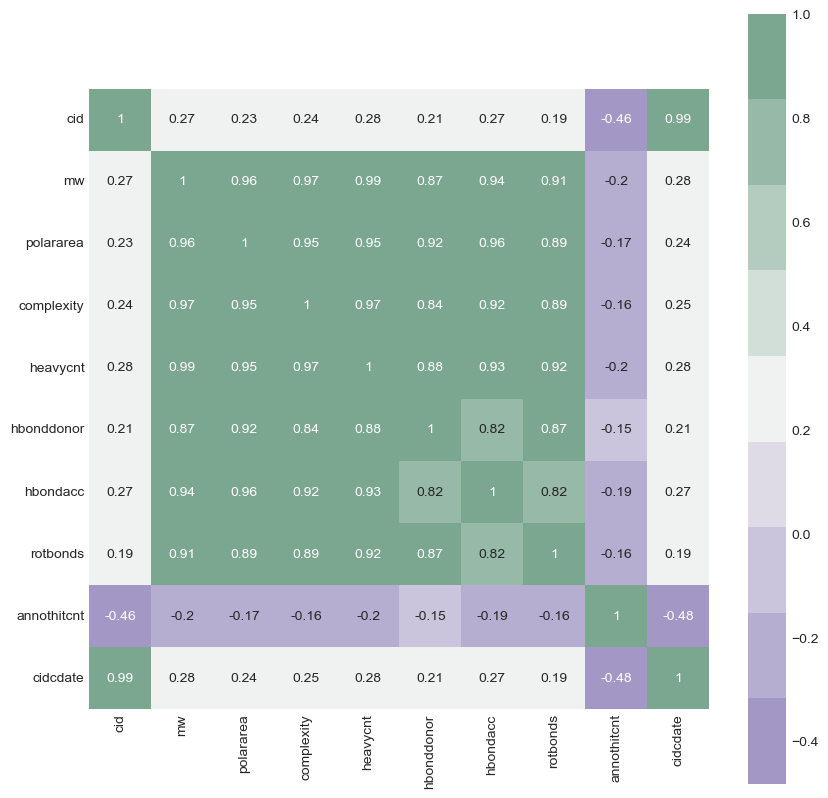

In [71]:
cmap = sns.diverging_palette(275,150,s=40,l=65,n=9)
corrma = df_refine_drug.corr()
plt.rcParams["figure.figsize"] = (10,10)
plt.plot()
sns.heatmap(corrma, cmap=cmap, annot=True, square= True);

In [73]:
df_refine_drug.isna().sum()

cid            0
cmpdname       0
cmpdsynonym    0
mw             0
mf             0
polararea      0
complexity     0
heavycnt       0
hbonddonor     0
hbondacc       0
rotbonds       0
inchi          0
isosmiles      0
inchikey       0
iupacname      0
annothitcnt    0
cidcdate       0
dtype: int64


     ---------------------------------------- 23.3/23.3 MB 4.7 MB/s eta 0:00:00
     ---------------------------------------- 2.3/2.3 MB 5.1 MB/s eta 0:00:00


     ------------------------------------ 100.4/100.4 kB 639.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
